# Parameter estimation of exponential distribution with finite sampling time and rate

Created on Wed Mar  6 07:49:41 2019 @author: Jongmin Sung

In [11]:
# Import library
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'True=10.0 (k), Mean=10.0 (b) (#sample=10000)')

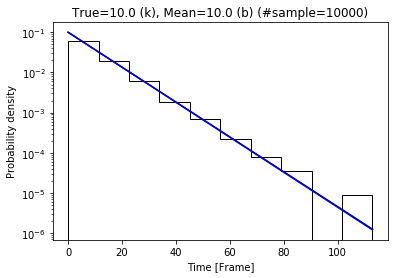

In [12]:
# Generate n_sample from exponential distribution with t_true
n_sample = 10000
t_true = 10
t_sample = np.random.exponential(t_true, n_sample) 
t_mean = t_sample.mean()

# Mean estimator works well. 
t = np.linspace(0, t_sample.max(), 100)
exp_true = np.exp(-t/t_true)/t_true
exp_mean = np.exp(-t/t_mean)/t_mean

# Plot the result
fig, ax = plt.subplots(1, 1)
ax.hist(t_sample, color='k', histtype='step', density='True', lw=1)
ax.plot(t, exp_true, 'k')
ax.plot(t, exp_mean, 'b')
ax.set_yscale('log')
ax.set_xlabel('Time [Frame]')
ax.set_ylabel('Probability density')
ax.set_title('True=%.1f (k), Mean=%.1f (b) (#sample=%d)' %(t_true, t_sample.mean(), n_sample))

Text(0.5, 1.0, 'True=10.0 (k), Mean=6.8 (b) (Max=20.0, #sample=10000)')

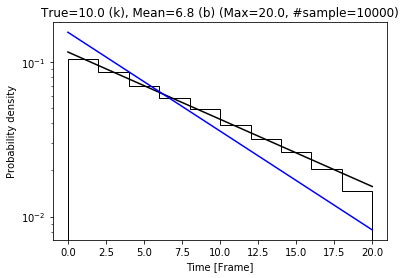

In [13]:
# Now we introduce a finite sampling time issue [0, t_max]
# Mean estimator underestimates due to missing long evetns.

t_max = 20 
t_sample = t_sample[t_sample<t_max] # Take sample below t_max
t_mean = t_sample.mean()

t = np.linspace(0, t_max, 100)

# Exponential from t_true
exp_true = np.exp(-t/t_true)/t_true
exp_true = exp_true/(1-np.exp(-t_max/t_true)) # Normalization 

# Exponential from mean estimator 
exp_mean = np.exp(-t/t_mean)/t_mean
exp_mean = exp_mean/(1-np.exp(-t_max/t_mean)) # Normalization

# Plot the result
fig, ax = plt.subplots(1,1)
ax.hist(t_sample, color='k', histtype='step', density='True', lw=1)
ax.plot(t, exp_true, 'k')
ax.plot(t, exp_mean, 'b')
ax.set_yscale('log')
ax.set_xlabel('Time [Frame]')
ax.set_ylabel('Probability density')
ax.set_title('True=%.1f (k), Mean=%.1f (b) (Max=%.1f, #sample=%d)' %(t_true, t_mean, t_max, n_sample))

### We correct the finite sampling effect with Eq. (1)

\begin{equation*}
\large \tau = \bar{t} + \frac{t_{max}}{e^{\frac{t_{max}}{\tau}}-1} \qquad (1)
\end{equation*}

In [14]:
# Find the correct mean based on Eq. (1)
def find_correct_mean(n_iter, t_mean, t_max):
    t_corr = t_mean  # Initial guess with mean"
    
    for i in range(n_iter): 
        t_corr = t_mean + t_max / (np.exp(t_max/t_corr) - 1) 

    return t_corr # return the final value after iterations

Text(0.5, 1.0, 'True=10.0 (k), Corr=9.8 (r), Max=20.0')

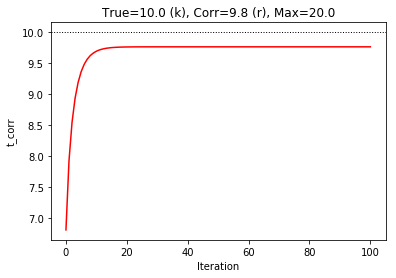

In [15]:
# Do iteration. 
# t_corr converges after iterations.  
n_iter = 100
t_corr = [find_correct_mean(i, t_mean, t_max) for i in range(n_iter+1)]

# Plot the result
fig, ax = plt.subplots(1,1)
ax.plot(t_corr, 'r')
ax.axhline(y=t_true, color='k', linestyle='dotted', lw=1)   
ax.set_xlabel('Iteration')
ax.set_ylabel('t_corr')
ax.set_title('True=%.1f (k), Corr=%.1f (r), Max=%.1f' %(t_true, t_corr[-1], t_max))

Text(0.5, 1.0, 'True=10.0 (k), Corr=9.8 (r), Mean=6.8 (b) (Max=20.0, #sample=10000)')

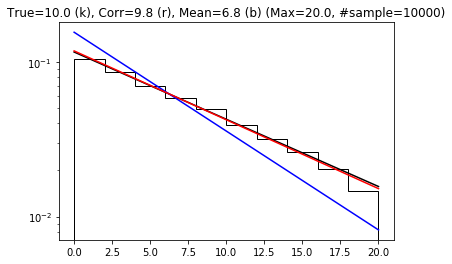

In [16]:
# Now, the corrected mean estimator works properly.
t = np.linspace(0, t_max, 100)

# Exponential from t_true
exp_true = np.exp(-t/t_true)/t_true
exp_true = exp_true/(1-np.exp(-t_max/t_true)) # Normalization 

# Exponential from mean estimator 
exp_mean = np.exp(-t/t_mean)/t_mean
exp_mean = exp_mean/(1-np.exp(-t_max/t_mean)) # Normalization

# Exponential from corrected mean estimator 
exp_corr = np.exp(-t/t_corr[-1])/t_corr[-1]
exp_corr = exp_corr/(1-np.exp(-t_max/t_corr[-1])) # Normalization

# Plot the result
fig, ax = plt.subplots(1,1)  
ax.hist(t_sample, color='k', histtype='step', density='True', lw=1)
ax.plot(t, exp_true, 'k')
ax.plot(t, exp_mean, 'b')
ax.plot(t, exp_corr, 'r')
ax.set_yscale('log')
ax.set_title('True=%.1f (k), Corr=%.1f (r), Mean=%.1f (b) (Max=%.1f, #sample=%d)' %(t_true, t_corr[-1], t_mean, t_max, n_sample))

Text(0.5, 1.0, 't_corr (mean+/-std, #set=1000, #data=10000)')

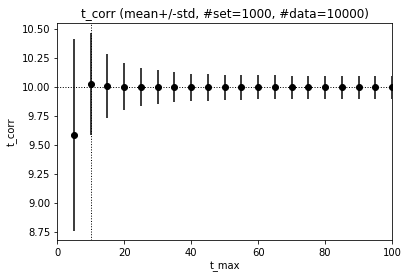

In [17]:
# Now I check the accuracy and precison with n_dataset and varying t_max
n_dataset = 1000
t_max_range = np.arange(int(t_true/2), int(t_true*10)+1, int(t_true/2)) 

result = np.zeros((n_dataset, len(t_max_range))) 

# Run for n_dataset
for i in range(n_dataset):
    # Generate n_sample rv from exponential distribution
    t_sample = np.random.exponential(t_true, n_sample)    
    
    # Parameter estimation of t_corr with varying t_max        
    for j, t_ub in enumerate(t_max_range):
        t_sample_max = t_sample[t_sample < t_ub]
        t_mean = t_sample_max.mean()
        result[i][j] = find_correct_mean(n_iter, t_mean, t_max_range[j])

# Mean and std of the t_corr estimation with varying t_max        
t_corr_mean = result.mean(axis=0) 
t_corr_std = result.std(axis=0)     

# Plot the accuracy and precision
fig, ax = plt.subplots(1,1)    
ax.errorbar(t_max_range, t_corr_mean, yerr = t_corr_std, color='k', fmt='o')
ax.axhline(y=t_true, color='k', linestyle='dotted', lw=1)   
ax.axvline(x=t_true, color='k', linestyle='dotted', lw=1)
ax.set_xlim([0, t_max_range.max()])
ax.set_xlabel('t_max')
ax.set_ylabel('t_corr')    
ax.set_title('t_corr (mean+/-std, #set=%d, #data=%d)' %(n_dataset, n_sample))

Text(0.5, 1.0, 't_corr (mean+/-std, #set=1000, #data=10000)')

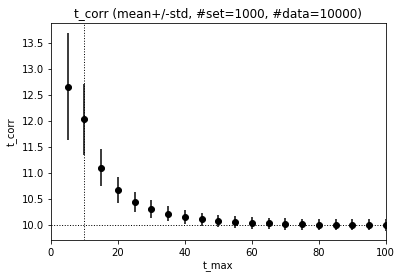

In [22]:
# Now, we introduce a finite sampling rate issue. 
# The actual dwell time measurement is not continuous (analog) but discrete (digital). 
#
# Here, we consider three time variables (t_interval, t_max, t_exposure), where
#
# t_interval = average time interval between consecutive sampling (= inverse sampling frequency) 
# t_max = total time when the final sampling is done (= number of frame * t_interval)
# t_exposure = time duration for one sampling where laser excitation and camera photon counting is done. 
#
# For example, image is taken every 1 s (t_interval) with 0.1 s exposure (t_exposure) for total 100 s (t_max).
#
# Usually, t_exposure is set to be much shorter than the t_interval to miminize photo bleaching. 
# Hence, an event that ends before the next sampling is not counted, and the dwell time is rounded down. 
# In this case, the probability distribution is geometric distribution. 

# Reference:
# Precisely and Accurately Inferring Single-Molecule Rate Constants (2016)
# Wikipedia: Geometric distribution

# Run for n_dataset
for i in range(n_dataset):
    # Generate n_sample rv from exponential distribution
    t_sample = np.random.exponential(t_true, n_sample)    
    
    # Parameter estimation of t_corr with varying t_max        
    for j, t_ub in enumerate(t_max_range):
        t_sample_d = np.floor(t_sample)            # Here the dwell time is rounded down.         
        t_sample_d = t_sample_d[t_sample_d < t_ub] # Below the t_max
        t_sample_d = t_sample_d[t_sample_d > 0]    # Exclude zero dwell time since it is not experimentally measured. 

        t_mean = t_sample_d.mean()
        tau = find_correct_mean(n_iter, t_mean, t_max_range[j])
        t_corr = -1/np.log(1-1/tau) # Relation between exponential and geometric
        result[i][j] = t_corr
#        p_transition = 1/t_corr
#        result[i][j] = t_corr/(1-p_transition) # Excluding non

# Mean and std of the t_corr estimation with varying t_max        
t_corr_mean = result.mean(axis=0) 
t_corr_std = result.std(axis=0)     

# Plot the accuracy and precision
fig, ax = plt.subplots(1,1)    
ax.errorbar(t_max_range, t_corr_mean, yerr = t_corr_std, color='k', fmt='o')
ax.axhline(y=t_true, color='k', linestyle='dotted', lw=1)   
ax.axvline(x=t_true, color='k', linestyle='dotted', lw=1)
ax.set_xlim([0, t_max_range.max()])
ax.set_xlabel('t_max')
ax.set_ylabel('t_corr')    
ax.set_title('t_corr (mean+/-std, #set=%d, #data=%d)' %(n_dataset, n_sample))

# To Henrik: 
## This is biased. I think the finite time correction for geometric distribution is different from exponential. I found how you did the integration with exponential, but not sure with geometric. Could you teach me the correct formula?

## According to Kinz-Thompson et al. (2016), they also consider a correction Eq. (9) due to missing zero dwell time. In practice, we not only miss the zero dwell time but also very short dwell time, like dwell time of equal or less than one or two, in order to exclude transient noise (unbound molecule passing by or non-specific binding). In this case, we might need to consider not only t_max but also t_min. What would be the best way?

## Maybe better to use MLE with lb and ub? Also, smoothening might be needed (multiply error function) since the ub or lb time are not sharp cut in real experiment. For example, ligand binding and unbinding are not synchronized with our measurement (unlike bulk stopped flow experiment). Hence, success of sampling is not equally distributed for different dwell time. Shorter events are more sampled but longer events are less sampled since it just might not complete the binding/unbinding transition during the time window. The non-uniform sampling might significantly under-estimate the dwell time, which is actually shown in my previous HMM simulation. 